In [11]:
import os
import sys
import importlib
from functools import partial

import h5py
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


sys.path.append('../../../')
import forward_model
importlib.reload(forward_model)
from forward_model.ics import get_delta
from forward_model.utils import compute_or_load_pow_spec
from forward_model.plot_utils import compare_pow_spec
from forward_model.stats import get_pow_spec_1D
from forward_model.fourier import my_ifft, get_k

natural spread in pk copmuation in 1D depends on nk it is plotted there so it is expected to have spread in the pk computed from different realizations, 

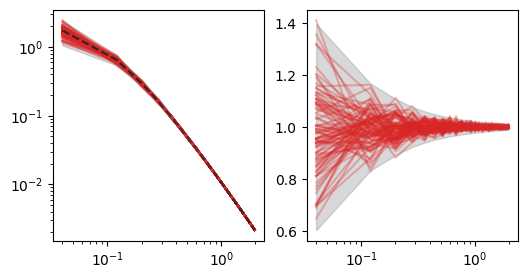

In [28]:
M = 100
N, L, Z_I = 128, 200, 99
SHAPE = (N**3,)
n_bins = 25
sphere_only = True

pow_spec = compute_or_load_pow_spec(N, L, Z_I)

k = get_k(N, L)
fact = 1 / jnp.sqrt(3) if sphere_only else 1.0
k_bins = jnp.linspace(k.min(), k.max() * fact, n_bins + 1)
N_k, _ = jnp.histogram(k, bins=k_bins)

k, pk_ = get_pow_spec_1D(
    my_ifft(pow_spec ** (1 / 2), L) * L ** (3 / 2), L, n_bins, sphere_only=sphere_only
)
pk_std = pk_ * jnp.sqrt(2 / N_k)


key = jax.random.PRNGKey(1)
pks = []
for i in range(M):
    key, _ = jax.random.split(key)
    u = jax.random.normal(key, shape=SHAPE)
    din = get_delta(u, N, L, "U", pow_spec, return_hat=False)

    k, pk = get_pow_spec_1D(din, L, n_bins, sphere_only=sphere_only)
    pks.append(pk)


fs, rat = 3, 2
fig, axs = plt.subplots(1, 2, figsize=(fs * rat, fs))

axs[0].plot(k, pk_, c="k", alpha=1, ls="--", zorder=10)
axs[0].fill_between(
    k, pk_ - 2 * pk_std, pk_ + 2 * pk_std, color="grey", alpha=0.3, zorder=10
)

axs[1].fill_between(
    k, (pk_ - 2 * pk_std)/pk_, (pk_ + 2 * pk_std)/pk_, color="grey", alpha=0.3, zorder=10
)


for pk in pks[:]:
    axs[0].plot(k, pk, c="r", alpha=0.3)
    axs[1].plot(k, pk / pk_, c="r", alpha=0.3)

# k, pk_ = get_pow_spec_1D(
#     my_ifft(pow_spec ** (1 / 2), L) * L ** (3 / 2), L, n_bins, sphere_only=True
# )
# pk_std = pk * jnp.sqrt(2/N_k)


# axs[0].plot(k, pk_, c="k", alpha=1, ls="--")
# axs[1].plot(k, pk_ / pks[0], c="k", alpha=1, ls="--")

axs[0].set_yscale("log")
for ax in axs:
    ax.set_xscale("log")

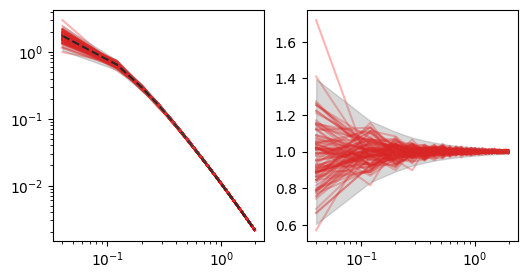

In [29]:
M = 100
N, L, Z_I = 128, 200, 99
SHAPE = (N,)*3
n_bins = 25
sphere_only = True

pow_spec = compute_or_load_pow_spec(N, L, Z_I)

k = get_k(N, L)
fact = 1 / jnp.sqrt(3) if sphere_only else 1.0
k_bins = jnp.linspace(k.min(), k.max() * fact, n_bins + 1)
N_k, _ = jnp.histogram(k, bins=k_bins)

k, pk_ = get_pow_spec_1D(
    my_ifft(pow_spec ** (1 / 2), L) * L ** (3 / 2), L, n_bins, sphere_only=sphere_only
)
pk_std = pk_ * jnp.sqrt(2 / N_k)


key = jax.random.PRNGKey(1)
pks = []
for i in range(M):
    key, _ = jax.random.split(key)
    u = jax.random.normal(key, shape=SHAPE)
    din = get_delta(u, N, L, "FSK_U", pow_spec, return_hat=False)

    k, pk = get_pow_spec_1D(din, L, n_bins, sphere_only=sphere_only)
    pks.append(pk)


fs, rat = 3, 2
fig, axs = plt.subplots(1, 2, figsize=(fs * rat, fs))

axs[0].plot(k, pk_, c="k", alpha=1, ls="--", zorder=10)
axs[0].fill_between(
    k, pk_ - 2 * pk_std, pk_ + 2 * pk_std, color="grey", alpha=0.3, zorder=10
)

axs[1].fill_between(
    k, (pk_ - 2 * pk_std)/pk_, (pk_ + 2 * pk_std)/pk_, color="grey", alpha=0.3, zorder=10
)


for pk in pks[:]:
    axs[0].plot(k, pk, c="r", alpha=0.3)
    axs[1].plot(k, pk / pk_, c="r", alpha=0.3)

# k, pk_ = get_pow_spec_1D(
#     my_ifft(pow_spec ** (1 / 2), L) * L ** (3 / 2), L, n_bins, sphere_only=True
# )
# pk_std = pk * jnp.sqrt(2/N_k)


# axs[0].plot(k, pk_, c="k", alpha=1, ls="--")
# axs[1].plot(k, pk_ / pks[0], c="k", alpha=1, ls="--")

axs[0].set_yscale("log")
for ax in axs:
    ax.set_xscale("log")